# 📘 Análisis de Latencia en Redes TCP con Cálculo Diferencial y Machine Learning

### 1. LIBRERIAS

In [1]:
# 📦 Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### 2. CARGAR LOS DATOS DEL ARCHIVO CSV

In [2]:
# 📥 Cargar datos del archivo CSV y formatearlos para permitir su exploración con los comandos en python
# Te recomiendo instalar la extensión Data Wrangler para una mejor visualización de la tabla

df = pd.read_csv("Tabla_ping_masivaa.csv")  # Asegúrate de que este archivo esté en el mismo directorio
df1 = df[['Distancia(km)' ,'Latencia(ms)', 'Saltos', 'Tiempo promedio por salto(ms)']]
df1.head()


,Distancia(km),Latencia(ms),Saltos,Tiempo promedio por salto(ms)
0,16160,290,24,12.1
1,1778,60,11,5.5
2,3715,85,13,6.5
3,3912,80,13,6.2
4,18693,320,26,12.3


### 3. EXPLORACIÓN Y LIMPIEZA DE DATOS

In [3]:
# 🧹 2. Exploración y limpieza básica de datos para verificar si casillas vacias
# Aqui puedes encontrar el valor medio, la desviación estandar, el valor minimo o maximo de las variables cuantitativas del modelo
print(df1.describe())
print(df1.isnull().sum())


       Distancia(km)  Latencia(ms)     Saltos  Tiempo promedio por salto(ms)
count      40.000000     40.000000  40.000000                      40.000000
mean     6238.425000    124.725000  13.500000                      21.476750
std      4130.607808     86.678003   5.892194                      21.686468
min      1778.000000     32.000000   3.000000                       4.280000
25%      3700.750000     72.750000  10.000000                       6.900000
50%      4216.500000     90.000000  13.000000                      11.850000
75%      8283.500000    139.750000  14.000000                      27.087500
max     18693.000000    360.000000  30.000000                      86.330000
Distancia(km)                    0
Latencia(ms)                     0
Saltos                           0
Tiempo promedio por salto(ms)    0
dtype: int64


### 4. GRAFICA DE PARES O PAIRPLOT: Muestra relaciones entre múltiples variables numéricas 

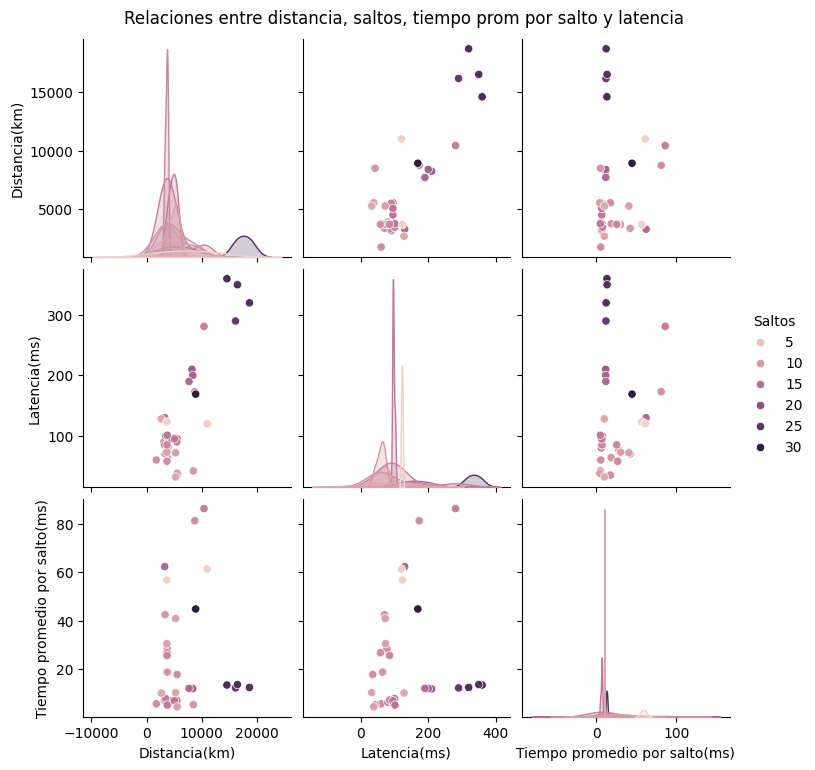

In [4]:
# 🔍 3. Visualización inicial de relaciones
sns.pairplot(df1, hue='Saltos')
plt.suptitle("Relaciones entre distancia, saltos, tiempo prom por salto y latencia", y=1.02)
plt.show()


### 5. DIAGRAMA DE DISPERSION

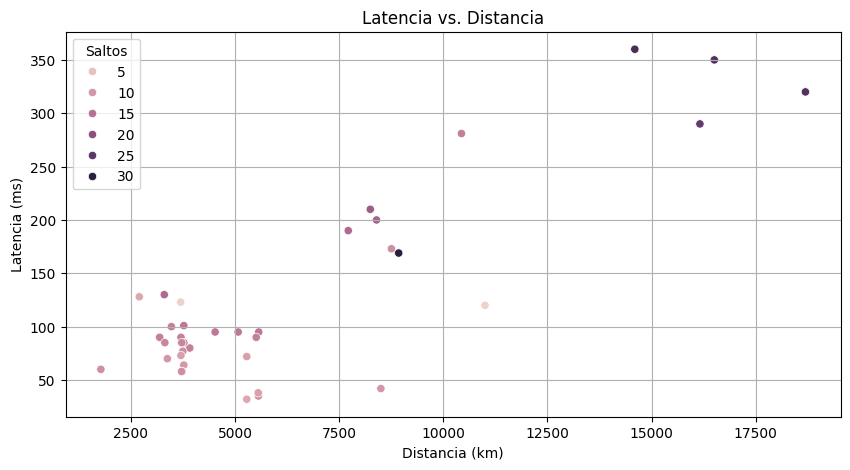

In [5]:
# 📈 4. Análisis gráfico de comportamiento funcional
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='Distancia(km)', y='Latencia(ms)', hue='Saltos')
plt.title("Latencia vs. Distancia")
plt.xlabel("Distancia (km)")
plt.ylabel("Latencia (ms)")
plt.grid(True)
plt.show()


### 6. MODELO FUNCIONAL TEORICO

In [6]:
# 📊 5. Modelo teórico: Latencia = (distancia / velocidad) + (saltos*tiempo promedio por saltos)
# prueba con las diferentes opciones de velocidad y verifica que tanto se ajusta el modelo a la latencia real

v = 200  # km/ms suponiendo fibra optica
#v = 300 #km/ms wifi
#v = 100 #km/ms cable

df1['latencia_modelo'] = (df1['Distancia(km)'] / v) + (df1['Saltos'] * df1['Tiempo promedio por salto(ms)'])


C:\Users\acmen\AppData\Local\Temp\ipykernel_24456\1086237962.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['latencia_modelo'] = (df1['Distancia(km)'] / v) + (df1['Saltos'] * df1['Tiempo promedio por salto(ms)'])


### 7. GRAFICO DE LINEA: MODELO REAL VS MODELO TEORICO

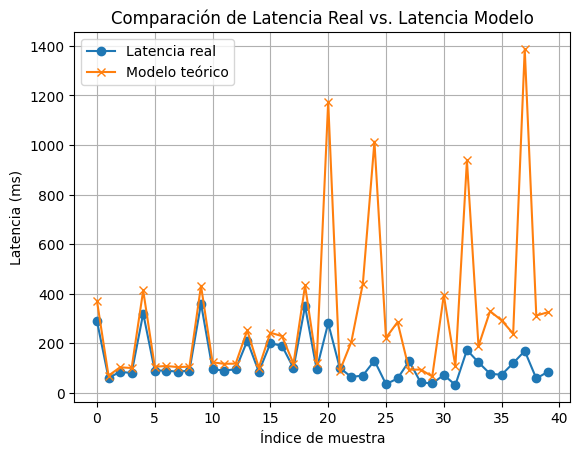

In [7]:
# Comparación gráfica
plt.plot(df1['Latencia(ms)'], label='Latencia real', marker='o')
plt.plot(df1['latencia_modelo'], label='Modelo teórico', marker='x')
plt.legend()
plt.title("Comparación de Latencia Real vs. Latencia Modelo")
plt.ylabel("Latencia (ms)")
plt.xlabel("Índice de muestra")
plt.grid(True)
plt.show()